# Input/Output - reading and modifying files and tables

One of the most fundamental and useful tasks one can perform using a programming language is to read and write data tables and files. This brief lesson shows an overview of three possible approaches to this type of tasks within *python*, with practical examples.

## Reading a text file line by line
Python has basic built-in text file input/output capabilities. Files can be opened with the `open` built-in function, based on a C-style notation: `stream = open(filename)` assigns a python `file object` to the variable name `stream`, that provides methods to access the file content. By default, text files are open in read-only mode: the keyword `mode` can be used to access the file in different modes, as follows:

<table class="docutils align-default" id="index-5">
<colgroup>
<col style="width: 13%">
<col style="width: 88%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Character</p></th>
<th class="head"><p>Meaning</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">'r'</span></code></p></td>
<td><p>open for reading (default)</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">'w'</span></code></p></td>
<td><p>open for writing, truncating the file first</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">'x'</span></code></p></td>
<td><p>open for exclusive creation, failing if the file already exists</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">'a'</span></code></p></td>
<td><p>open for writing, appending to the end of the file if it exists</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">'b'</span></code></p></td>
<td><p>binary mode</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">'t'</span></code></p></td>
<td><p>text mode (default)</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">'+'</span></code></p></td>
<td><p>open for updating (reading and writing)</p></td>
</tr>
</tbody>
</table>

The most commonly used methods of the `file object`, when dealing with text files, are `readline`, `readlines`, `writelines`, `seek` and `close`.

- `readline` returns a string with the content of the next line in the file;
- `readlines` returns a list of strings containing all lines in the file;
- `writelines` writes a list of strings to the file;
- `seek` moves the current position within the file (typically used to go back to the beginning of the file);
- `close` closes (and saves, if in write mode) the file.


Here is a simple example:

In [2]:
# open an example text file
sonnet = open('../misc/example_text_file.txt','r')

# print the first line
line = sonnet.readline()
print('First line:',line)

# move back to the beginning of file, then read all lines and print them one by one
sonnet.seek(0)
lines = sonnet.readlines()

print('The lines object is of type {}\n'.format(type(lines)))

print('Full file content:')
for l in lines:
    print(l,end='') # don't add newlines at the end of print, they're already in the file

# count the file lines
n_lines = len(lines) # all lines
n_empty = 0 # empty lines
for li in lines:
    if len(li)<=1:
        n_empty+=1

print('\nThe file contains {0:d} lines. {1:d} of these contain some text.'.format(
      n_lines,n_lines-n_empty))
      

sonnet.close() # close the stream

First line: de viajes y dolores yo regresé, amor mío,

The lines object is of type <class 'list'>

Full file content:
de viajes y dolores yo regresé, amor mío,
a tu voz, a tu mano volando en la guitarra,
al fuego que interrumpe con besos el otoño,
a la circulación de la noche en el cielo.

Para todos los hombres pido pan y reinado,
pido tierra para el labrador sin ventura,
que nadie espere tregua de mi sangre o mi canto.
Pero a tu amor no puedo renunciar sin morirme.

Por eso toca el vals de la serena luna,
la barcarola en el agua de la guitarra
hasta que se doblegue mi cabeza soñando:

que todos los desvelos de mi vida tejieron
esta enramada en donde tu mano vive y vuela
custodiando la noche del viajero dormido.

The file contains 17 lines. 14 of these contain some text.


## Reading and saving arrays and tables with numpy

The `numpy` package has input/output capabilities, especially oriented to saving its own arrays and reading tables of numerical data. Numpy arrays can be saved and loaded simply through the `numpy.save` and `numpy.load` functions:

In [3]:
import numpy as np

# create an array with random entries
x = np.random.uniform(0.,3.,[4,3])

# save it to a file in binary ".npy" format
np.save('../misc/x.npy',x)

# reload it to a new array
y = np.load('../misc/x.npy')

# demonstrate it is identical to the original one
print(x.shape,y.shape)
print(x-y)

(4, 3) (4, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In case of large arrays, they can be saved to a **compressed binary format** `.npz` in order to save space, using the `numpy.savez` function. When a compressed array is loaded, a `<class 'numpy.lib.npyio.NpzFile'>` object is returned, instead of an array. The actual array is accessed by the `[arr_0]` key:

In [4]:
# save compressed array
np.savez('../misc/x_compressed.npz',x)

# load it
z = np.load('../misc/x_compressed.npz')
print(type(z))

# access the data
z_data = z['arr_0']

# demonstrate it is identical to the original data
print(x.shape,z_data.shape)
print(x-z_data)

<class 'numpy.lib.npyio.NpzFile'>
(4, 3) (4, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


The `numpy` function `savetxt` can be used to save the array content in ASCII (text) format, in order for it to be human-readable:

In [5]:
# save the x array in text format
np.savetxt('../misc/x.txt',x)

# print its content
stream = open('../misc/x.txt','r')

print('Text file:')
for line in stream:
    print(line,end='')
stream.close()

# print the original array
print('\nOriginal array:')
print(x)

Text file:
2.609415308159375169e-01 2.275039494275099550e-02 2.930727003581519163e-01
1.394900882879077209e+00 2.824403619041248037e-01 5.387305353244375983e-01
2.868762264927310568e+00 6.622036170623922802e-01 1.489099696184939869e+00
1.408615297121952992e+00 2.746463911199057861e+00 7.078998823832896026e-01

Original array:
[[0.26094153 0.02275039 0.2930727 ]
 [1.39490088 0.28244036 0.53873054]
 [2.86876226 0.66220362 1.4890997 ]
 [1.4086153  2.74646391 0.70789988]]


The `np.savetxt` function has a number of keyword arguments which can be used to control the format the data is saved in, the separator character, the presence of a header and a footer, and of comments at the beginning of the file. This makes it suitable to produce simple human-readable tables from numpy arrays.

In [6]:
# save a more human-readable version of the previous table
np.savetxt('../misc/x_hr.txt',x,
           header='x_i\t|\ty_i\t|\tz_i',
           comments='# random 3D coordinates\n',
           delimiter='\t|\t',
           fmt='%1.3f')

# print its content
stream = open('../misc/x_hr.txt','r')

for line in stream:
    print(line,end='')
stream.close()

# random 3D coordinates
x_i	|	y_i	|	z_i
0.261	|	0.023	|	0.293
1.395	|	0.282	|	0.539
2.869	|	0.662	|	1.489
1.409	|	2.746	|	0.708


When loading such a table, one can use the `np.loadtxt` function, using the keywords to inform it about the peculiarities in the format:

In [7]:
coords = np.loadtxt('../misc/x_hr.txt',skiprows=2,delimiter='\t|\t')

print(coords)

[[0.261 0.023 0.293]
 [1.395 0.282 0.539]
 [2.869 0.662 1.489]
 [1.409 2.746 0.708]]


Two useful optional keywords in the `loadtxt` function are `usecols` and `unpack`. The former is used to load only a subset of the columns in the file. The latter is used to return a list of 1D arrays separately containing the column data, instead of a single array of shape (nrows,ncols).

In [8]:
# only load the x,z coordinates
xz_coords = np.loadtxt('../misc/x_hr.txt',skiprows=2,delimiter='\t|\t',usecols=(0,2))

# load the coordinates in separate 1D arrays
x_i,y_i,z_i = np.loadtxt('../misc/x_hr.txt',skiprows=2,delimiter='\t|\t',unpack=True)

print('x_i=',xz_coords[:,0])
print('x_i=',x_i)

print('z_i=',xz_coords[:,1])
print('z_i=',z_i)

x_i= [0.261 1.395 2.869 1.409]
x_i= [0.261 1.395 2.869 1.409]
z_i= [0.293 0.539 1.489 0.708]
z_i= [0.293 0.539 1.489 0.708]


The major limitations with the `loadtxt` function is that it does not handle missing values, and that it does not understand by itself tables with mixed numerical and non-numerical values. A **more advanced functionality** is implemented in **`numpy.genfromtxt`**, which handles missing values and can read in the column names to be used as keys for accessing the columns (very useful for large tables). It can also be asked to try to understand the data type of each column by itself. In order to show its functionalities in practice, we need to give it something sufficiently complex as input: let us try with the [catalogue](https://heasarc.gsfc.nasa.gov/W3Browse/all/fermigbrst.html) of *short gamma-ray bursts* observed by the *Gamma-ray burst monitor (GBM)* onboard the *Fermi* spacecraft. You can find a table containing a subset of that catalogue, called `fermi_gbm_short_grbs.table`, in the `misc` subdirectory of the repository. Let us take a look at the first few lines:

In [9]:
# open the file
tab = open('../misc/fermi_gbm_short_grbs.table','r')

# print the first 6 lines, showing line numbers, and shortening long lines
for i in range(6):
    l = tab.readline().strip('\n')
    if len(l)>77:
        l = l[:77] + '...'
    print(i+1,l)

tab.close()

1 
2 
3 Results from heasarc_fermigbrst: Fermi GBM Burst Catalog
4 Coordinate system:  Equatorial
5 |name        |ra        |dec      |t90     |t90_error|flux_64 |flux_64_error|...
6 |GRB080723913|07 33 12.0|-19 42 00|   0.192|    0.345|  5.2574|       0.7021|...


This is a large text table whose values, with mixed formats, are separated by the character `|`. By taking a look at the website, you'll also learn that the table potentially contains missing values. We can try to read it through `genfromtxt` by carefully setting some of its keywords. We need to:
- skip the first 4 lines, which contain auxiliary information: this is obtained by setting the `skip_header` keyword argument to `4`; 
- we need to specify the delimiter as `delimiter='|'`; 
- we need to skip the first column (to the left of the first `|`) as it is empty (otherwise `genfromtxt` would complain): this is obtained by setting `usecols=np.arange(1,17)` (yes, we need to know the number of columns in advance, unfortunately); 
- we would like to ask it to try to understand the column data types by itself: this is obtained by setting `dtype=None`;
- apparently, we also need to tell it to understand by itself how to encode strings, by setting `encoding=None`;
- finally, we want column names to be used as labels, which is obtained by setting `names=True` (this means that the first row **must** contain the column names.

Here's the resulting function call:

In [10]:
# load fermi sgrb table
data = np.genfromtxt('../misc/fermi_gbm_short_grbs.table',
                     delimiter="|",
                     skip_header=4,
                     names=True,
                     usecols=np.arange(1,17),
                     dtype=None,
                     encoding=None)

print('Column names and dtypes: ', data.dtype)
print('Data array shape: ',data.shape)

Column names and dtypes:  [('name', '<U12'), ('ra', '<U10'), ('dec', '<U9'), ('t90', '<f8'), ('t90_error', '<f8'), ('flux_64', '<f8'), ('flux_64_error', '<f8'), ('pflx_comp_epeak', '<f8'), ('pflx_comp_epeak_pos_err', '<f8'), ('pflx_comp_epeak_neg_err', '<f8'), ('pflx_comp_index', '<f8'), ('pflx_comp_index_pos_err', '<f8'), ('pflx_comp_index_neg_err', '<f8'), ('pflx_comp_phtflux', '<f8'), ('pflx_comp_phtflux_error', '<f8'), ('f0', '?')]
Data array shape:  (489,)


Note that the resulting object is a **1D** array whose entries are structured objects, instead of 2D a matrix. The columns are now accessed by using their names as labels:

In [11]:
print(data['name'][0:10])

['GRB080723913' 'GRB080725541' 'GRB080802386' 'GRB080815917'
 'GRB080831053' 'GRB080905499' 'GRB080919790' 'GRB081012045'
 'GRB081024245' 'GRB081024891']


In [12]:
print(data['dec'][0:10])

['-19 42 00' '+08 54 00' '+40 42 00' '-47 48 00' '-51 42 00' '-18 54 00'
 '+44 24 00' '+04 30 00' '+61 18 00' '+21 12 00']


In [13]:
print(data['pflx_comp_phtflux'][0:10])

[ 5.40652   6.852386 10.74659   6.600304  4.098442  6.461617  4.932922
  7.080282  6.377586  5.778066]


In [14]:
print(data['pflx_comp_epeak'][-1])

nan


This last line of code demonstrates that some values are missing, in which case they're set to `nan` by default. 

## The pandas library
While `numpy.genfromtxt` provides a nice set of functionalities for reading data tables, a much more powerful tool is represented by the dedicated `pandas` python package. It delivers new data types calles `pandas.Series` (which represents data columns) and `pandas.DataFrame` (which represents tables). It comes with a large number of functions to read and convert a wide range of table formats (including, among others, excel sheets and sql databases) and provides very nicely formatted outputs both in the command line and in the output files, with little effort. Let's use its function `read_csv` to read the *Fermi/GBM* table:

In [15]:
import pandas

data2 = pandas.read_csv('../misc/fermi_gbm_short_grbs.table',
                        skiprows=4,# we need to specify the delimiter and the number of rows with comments
                        delimiter='|',
                        skipinitialspace=True)

In [16]:
data2 # show the table

,Unnamed: 0,name,ra,dec,t90,t90_error,flux_64,flux_64_error,pflx_comp_epeak,pflx_comp_epeak_pos_err,pflx_comp_epeak_neg_err,pflx_comp_index,pflx_comp_index_pos_err,pflx_comp_index_neg_err,pflx_comp_phtflux,pflx_comp_phtflux_error,Unnamed: 16
0,NaN,GRB080723913,07 33 12.0,-19 42 00,0.192,0.345,5.2574,0.7021,592.3087,336.26660,336.26660,-0.905227,0.361319,0.361319,5.406520,0.956193,NaN
1,NaN,GRB080725541,23 39 12.0,+08 54 00,0.960,1.292,6.2687,0.7758,429.2190,196.91460,196.91460,-0.862144,0.366255,0.366255,6.852386,1.099482,NaN
2,NaN,GRB080802386,10 17 12.0,+40 42 00,0.576,0.091,10.4115,1.1162,343.7138,81.84171,81.84171,-0.382830,0.324399,0.324399,10.746590,1.522778,NaN
3,NaN,GRB080815917,16 03 36.0,-47 48 00,0.832,0.320,6.2631,0.9671,656.5027,1232.40500,1232.40500,-1.203444,0.403150,0.403150,6.600304,1.413045,NaN
4,NaN,GRB080831053,14 04 48.0,-51 42 00,0.576,1.168,4.6597,1.1050,170.4839,32.33955,32.33955,0.999451,1.114133,1.114133,4.098442,0.831934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,NaN,GRB201221591,07 22 26.4,+32 02 24,0.032,0.369,15.7784,1.4022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,NaN,GRB201221963,11 24 14.2,+42 08 36,0.144,0.066,40.6065,2.1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,NaN,GRB201227635,11 20 29.0,-73 36 47,0.112,0.116,103.1770,4.8904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,GRB201231622,08 18 28.8,+39 03 36,0.256,0.500,8.1044,1.3049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When used with `jupyter notebook`, it displays tables in a beautifully formatted, scrollable format. It understood the column formats seamlessly, and didn't complain about the missing data in the first column. Column names are stored in the `columns` member of the resulting `DataFrame` class instance:

In [17]:
print(data2.columns)

Index(['Unnamed: 0', 'name        ', 'ra        ', 'dec      ', 't90     ',
       't90_error', 'flux_64 ', 'flux_64_error', 'pflx_comp_epeak',
       'pflx_comp_epeak_pos_err', 'pflx_comp_epeak_neg_err', 'pflx_comp_index',
       'pflx_comp_index_pos_err', 'pflx_comp_index_neg_err',
       'pflx_comp_phtflux', 'pflx_comp_phtflux_error', 'Unnamed: 16'],
      dtype='object')


Unfortunately, one annoying aspect is that `pandas` keeps any whitespace between delimiters as part of the column names. We can fix that as follows:

In [18]:
data2.columns = data2.columns.str.strip() # use the method str.strip() to remove whitespace from the column names

In [19]:
print(data2.columns)

Index(['Unnamed: 0', 'name', 'ra', 'dec', 't90', 't90_error', 'flux_64',
       'flux_64_error', 'pflx_comp_epeak', 'pflx_comp_epeak_pos_err',
       'pflx_comp_epeak_neg_err', 'pflx_comp_index', 'pflx_comp_index_pos_err',
       'pflx_comp_index_neg_err', 'pflx_comp_phtflux',
       'pflx_comp_phtflux_error', 'Unnamed: 16'],
      dtype='object')


We can now access the column data using the column name as a label, as before:

In [20]:
data2['name'][0:10]

0    GRB080723913
1    GRB080725541
2    GRB080802386
3    GRB080815917
4    GRB080831053
5    GRB080905499
6    GRB080919790
7    GRB081012045
8    GRB081024245
9    GRB081024891
Name: name, dtype: object

An additional caveat is that indexing `pandas` columns with integer indices as if they were numpy arrays could produce errors: we better use the built-in locator `iloc`, as follows:

In [21]:
my_idx = [1,10,-1]

#data2['pflx_comp_phtflux'][my_idx] # <--- this doesn't work
data2['pflx_comp_phtflux'].iloc[my_idx] # <--- this does!

1      6.852386
10     7.048840
488         NaN
Name: pflx_comp_phtflux, dtype: float64


## Exercise 7

We now would like to compute and plot the inverse cumulative all-sky observed rate of short GRB peak photon fluxes from the catalog. The peak photon flux (in $\mathrm{photons}\,\mathrm{cm^{-2}}\,\mathrm{s^{-1}}$) of each event in the catalog is contained in column `pflx_comp_phtflux`, with the associated 1-sigma error being stored in column `pflx_comp_phtflux_error`. The inverse cumulative all-sky observed rate, which we denote as $\dot N(>p)$, is defined as the number of short GRBs that *Fermi/GBM* would detect per year above a given limiting photon flux $p$ if the detector had a 100% duty cycle (i.e. it never turned off) and a $4\pi$ field of view. Knowing that the actual field of view is $\Delta\Omega=9.5\,\mathrm{sr}$ and the average duty cycle is $\eta=0.7$ (due mainly to the detector having to turn off while passing through the [South Atlantic Anomaly](https://en.wikipedia.org/wiki/South_Atlantic_Anomaly)), we can estimate this quantity by computing the inverse cumulative distribution $N_\mathrm{obs}(>p)$ of the photon flux from the catalog, and then dividing by the total observing time $T$ (in years) and rescaling to account for the field of view and duty cycle, as follows: 
$$ \dot N(>p) = \eta^{-1}\frac{4\pi}{\Delta\Omega}\frac{N_\mathrm{obs}(>p)}{T} $$
The inverse cumulative distribution $N_\mathrm{obs}(>p)$ is most easily computed by sorting the photon fluxes in column `pflx_comp_phtflux` and simply "counting" the resulting array in descending order. In order to find out the total observing time, then, we can exploit the fact that GRB names contain the date of observation, in the format GRByymmddfff, where fff gives the trigger hour as a fraction of a day (understood as 0.fff). The result is best presented on a log-log plot (usually referred to as the "logN-logS" plot), as the expected distribution, at the highest fluxes, goes as $\propto p^{-3/2}$. We need to be careful, though, because of the missing values!

Total obs. time: 11.73 yr


Text(0, 0.5, '$\\dot N(>p)$ [yr$^{-1}$]')

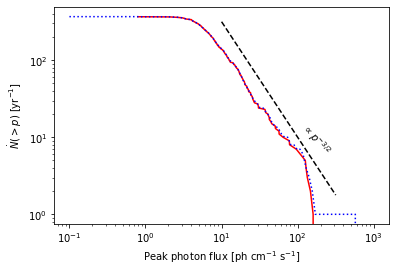

In [22]:
valid = data2['pflx_comp_phtflux']>0.
p = data2['pflx_comp_phtflux'][valid]
#s = np.argsort(data2['pflx_comp_phtflux'][valid]) # sorting index
s = np.argsort(p) # sorting index
Nobs = np.arange(len(p))[::-1] # inverse cumulative

P = np.logspace(-1.,3.,100) # independent x-axis variable
Nobs2 = np.zeros(len(P))

for i in range(len(P)):
    Nobs2[i]=len(p[p>=P[i]])

eta = 0.7 # GBM duty cycle
DOmega = 9.5 # GBM FoV

# find total obs time
sorted_names = np.sort(data2['name'][valid])
n0 = sorted_names[0].lstrip('GRB')
n1 = sorted_names[-1].lstrip('GRB')
t0 = float(n0[0:2]) + (float(n0[2:4])-1.)/12. + (float(n0[4:])-1.)/365000.
t1 = float(n1[0:2]) + (float(n1[2:4])-1.)/12. + (float(n1[4:])-1.)/365000.
T = t1-t0

print('Total obs. time: {0:.2f} yr'.format(T))

# compute inverse cumulative all-sky observed rate
dotN = eta**-1*4*np.pi/DOmega*Nobs/T

# show the result in a log-log plot
import matplotlib.pyplot as plt

plt.plot(p.iloc[s],Nobs,'-r')
plt.plot(P,Nobs2,':b')

# include theoretically expected distribution
p2 = np.logspace(1,2.5,10)
dotN_expected = 10.*(p2/100.)**-1.5
plt.plot(p2,dotN_expected,'--k')
plt.annotate(r'$\propto p^{-3/2}$',xy=(100.,6.),rotation=-50)

plt.loglog()
plt.xlabel(r'Peak photon flux [ph cm$^{-1}$ s$^{-1}$]')
plt.ylabel(r'$\dot N(>p)$ [yr$^{-1}$]')

How would you proceed if you wanted to show the uncertainty on the distribution arising from the photon flux measurement errors? And what about Poisson uncertainty in the low-count part of the distribution?

## Exercise 8

Plot the sky distribution of the gamma-ray bursts in the catalogue, to demonstrate it is isotropic (tip: you need an equal-area [projection](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/geo_demo.html) of the sphere!). Be aware that the coordinates are given as "right ascension (ra)" and "declination (dec)": these are essentially longitude and latitude, but the first is given in hh:mm:ss (24 hours = 360 degrees) and the second is given in dd:mm:ss (degrees, sexagesimal minutes, sexagesimal seconds). You need to convert these to the format required by matplotlib (decimal degrees).

## Exercise 9

The band over which *Fermi/GBM* is sensitive extends from about `8 keV` to several tens of thousands of `keV`, but the fluxes are customarily given in the narrower `[10-1000] keV` band. This is still much wider than the `[15-150] keV` band over which another instrument, the Burst Alert Telescope (BAT) onboard the *Neil Gehrels Swift Observatory* satellite, is sensitive. The *Swift* satellite, though, has much better localization capabilities, and can slew extremely fast in order to point its X-ray telescope towards the direction of the localized gamma-ray burst: these exceptional capabilities allow *Swift* to pinpont the host galaxy of many gamma-ray bursts, from which we can measure their redshifts. With these premises, and given the much larger band of *Fermi/GBM*, one may want to evaluate which fraction of gamma-ray bursts would be detectable by *Swift/BAT*, given the spectral information obtained from *Fermi/GBM*. To do that, we need a couple additional pieces of information:
- the spectral shape model that is fitted to the *GBM* spectra to provide the information contained in our table is defined as:
$$ \frac{dN}{dE} = A E^{\alpha} \exp(-(2+\alpha)E/E_\mathrm{peak}) $$
where $dN/dE$ denotes the number of photons (per unit detector area, per unit time) with energy $E=h\nu$ comprised between $E$ and $E+dE$ that hit the detector; $A$ is a normalization constant; $\alpha$ is known as the "low-energy spectral index" and its value is given in column `pflx_comp_index`; $E_\mathrm{peak}$ is the photon energy at which most of the gamma-ray burst energy is delivered.
- the sensitivity of *Swift/BAT* is such that, on average, gamma-ray bursts can be detected as long as their peak photon flux in the `[15-150] keV` band is larger than $0.4\, \mathrm{photons\, cm^{-2}\, s^{-1}}$.

Given these pieces of information, would you be able to evaluate which fraction of the gamma-ray bursts in the table would be detectable by *Swift/BAT*? Tip: remember that `np.trapz` provides an efficient way to compute numerical integrals with the trapezoidal rule, and be aware that it can even operate on n-dimensional arrays by integrating everything along a specified `axis`.